In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Modelling
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from catboost import CatBoostClassifier, CatBoostRegressor
from xgboost import  XGBRegressor
import warnings




In [3]:
df= pd.read_csv('data/stud.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
print("Train columns:", df.columns.tolist())
print("Test columns:", df.columns.tolist())


Train columns: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']
Test columns: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']


In [6]:
y=df['math score']

In [10]:
num_features=X.select_dtypes(exclude=['object']).columns
cat_features=X.select_dtypes(include=['object']).columns

from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

numerical_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numerical_transformer, num_features)
    ]
)

In [11]:
X = preprocessor.fit_transform(X)

In [12]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((800, 19), (200, 19), (800,), (200,))

Create an Evaluate Function to give all metrics after model training

In [14]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square


In [19]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "XGBRegressor": XGBRegressor(),
    "CatBoostRegressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()    
}
model_list=[]
r2_list=[]

for i in range(len(models)):
    model=list(models.values())[i]
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('mode performance on train data')
    print(f'MAE: {model_train_mae}')
    print(f'RMSE: {model_train_rmse}')
    print(f'R2: {model_train_r2}')
    print('mode performance on test data')
    print(f'MAE: {model_test_mae}')
    print(f'RMSE: {model_test_rmse}')
    print(f'R2: {model_test_r2}')
    r2_list.append(model_test_r2)
    print('-----------------------------------')
    print('\n')

LinearRegression
mode performance on train data
MAE: 4.26951171875
RMSE: 5.325665800352198
R2: 0.8741936903882622
mode performance on test data
MAE: 4.23470703125
RMSE: 5.421151078236201
R2: 0.8792262996178921
-----------------------------------


Lasso
mode performance on train data
MAE: 5.206302661246528
RMSE: 6.593815587795566
R2: 0.8071462015863456
mode performance on test data
MAE: 5.157881810347763
RMSE: 6.519694535667421
R2: 0.8253197323627852
-----------------------------------


Ridge
mode performance on train data
MAE: 4.264987823725982
RMSE: 5.323324922741654
R2: 0.8743042615212909
mode performance on test data
MAE: 4.211100688014262
RMSE: 5.390387016935641
R2: 0.8805931485028737
-----------------------------------


KNeighborsClassifier
mode performance on train data
MAE: 7.52
RMSE: 10.399519219656263
R2: 0.5202873984144492
mode performance on test data
MAE: 9.215
RMSE: 11.3738735706003
R2: 0.46837408316977514
-----------------------------------


DecisionTreeClassifier
mod

##RESULTS

In [20]:
pd.DataFrame({'Model': model_list, 'R2': r2_list}).sort_values(by='R2', ascending=False).reset_index(drop=True)

,Model,R2
0,Ridge,0.880593
1,LinearRegression,0.879226
2,CatBoostRegressor,0.851632
3,AdaBoost Regressor,0.839722
4,XGBRegressor,0.827797
5,Lasso,0.825320
6,RandomForestClassifier,0.644939
7,DecisionTreeClassifier,0.603515
8,KNeighborsClassifier,0.468374


R2 Score: 87.92%


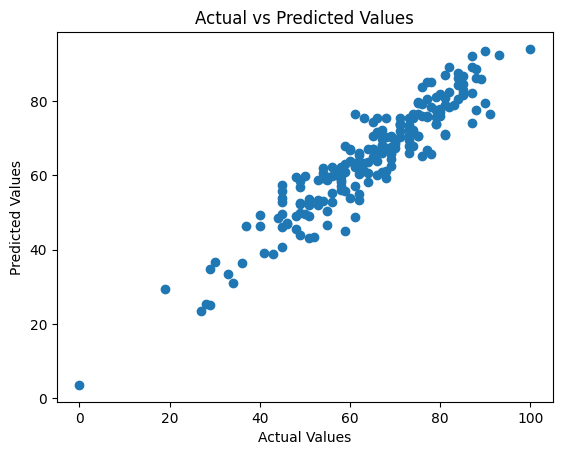

In [22]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train, y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test, y_pred)*100
print(f"R2 Score: {score:.2f}%")
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()